## 1. Read in the NYC Accidents CSV and create new 'DATETIME' column

In [1]:
import pandas as pd

data = pd.read_csv("/Users/siegmanA/Desktop/NYU-Projects-in-Programming-Fall-2019/(Class 7) Data Visualization/NYPD_Crashes.csv",low_memory=False)

data['DATETIME'] = data.DATE + ' ' + data.TIME # create a new field called 'datetime' that combines date and time
data.DATETIME = pd.to_datetime(data.DATETIME, format="%m/%d/%Y %H:%M") # format this new column as a datetime

## 2. Plot a random selection of 10,000 accidents in Brooklyn

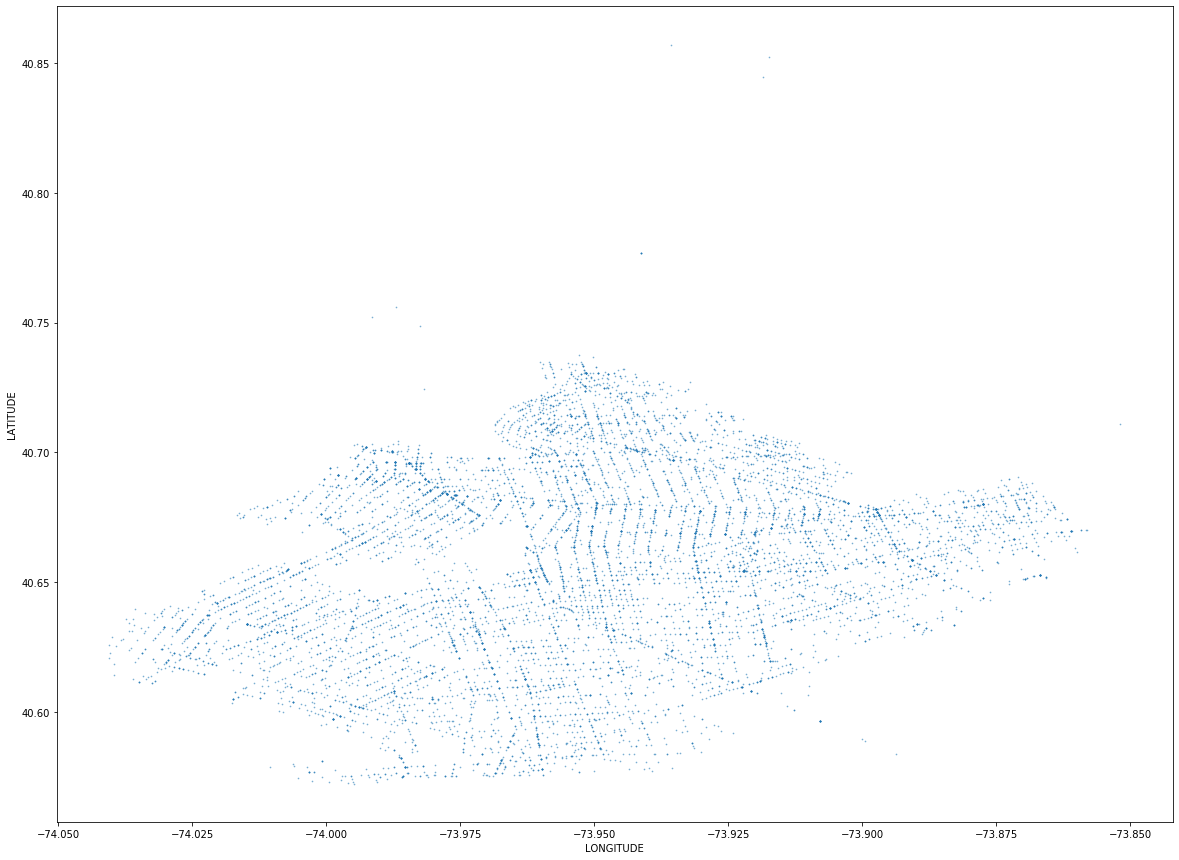

In [2]:
%matplotlib inline

clean_mask = (data.LATITUDE > 40) & (data.LATITUDE < 41) & (data.LONGITUDE < -72) & (data.LONGITUDE > -74.5)
cleandf = data[clean_mask]

cleandf = cleandf[cleandf['BOROUGH'] == 'BROOKLYN']

sample = cleandf.sample(n=10000)

sample.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.5)

## 3. Plot the sum of pedestrians injured between Jan. 1, 2018 and Mar. 1, 2018

In [3]:
crash_timeseries = data.pivot_table(
                        index='DATETIME', 
                        values='NUMBER OF PEDESTRIANS INJURED', 
                        aggfunc='sum'
                    ).interpolate(method='time') 

crash_timeseries.head()

,NUMBER OF PEDESTRIANS INJURED
DATETIME,
2012-07-01 00:05:00,0
2012-07-01 00:10:00,0
2012-07-01 00:20:00,0
2012-07-01 00:21:00,0
2012-07-01 00:22:00,0


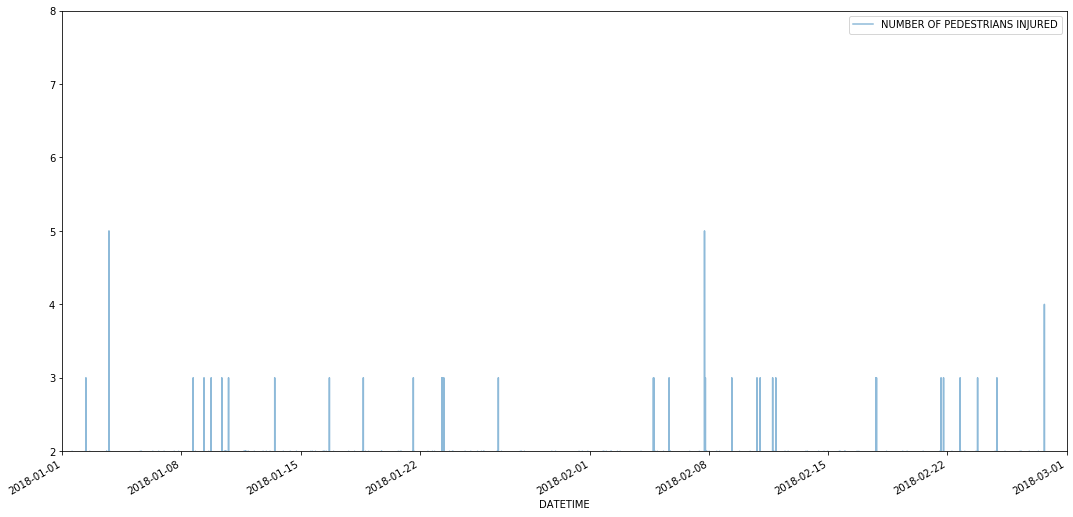

In [4]:
crash_timeseries.plot(alpha=.5, figsize=(18, 9), ylim=(2,8), xlim=('2018-1-1', '2018-3-1'), legend=True)

## 4. Use a pivot table to find the average number of pedestrians injured per datetime for each borough...

In [5]:
newCrash_timeseries = data.pivot_table(
                        index='DATETIME', 
                        columns='BOROUGH',
                        values='NUMBER OF PEDESTRIANS INJURED', 
                        aggfunc='mean',
                        fill_value = 0
                    ).interpolate(method='time') 

newCrash_timeseries.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
DATETIME,,,,,
2012-07-01 00:05:00,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:10:00,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:20:00,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:22:00,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:23:00,0.0,0.0,0.0,0.0,0.0


## 5. ...and plot the data as a timeseries between Jan. 1, 2019 and Jan. 8, 2019. 

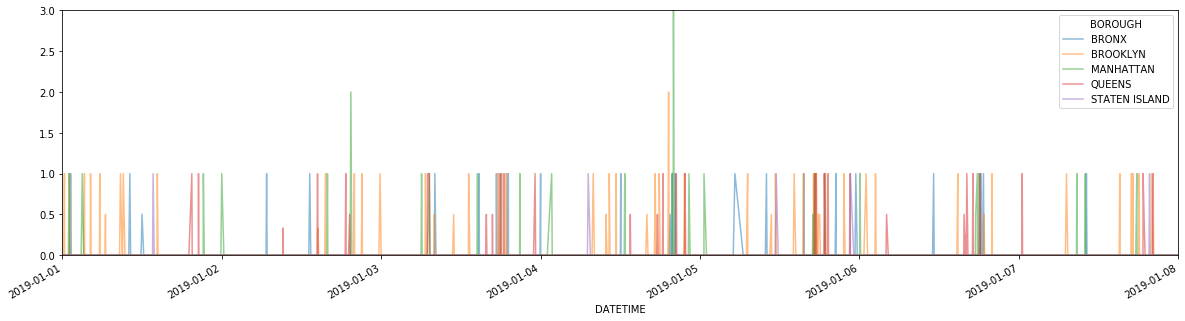

In [6]:
newCrash_timeseries[ ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'] ].plot(
    alpha=0.5,  
    legend=True, 
    figsize=(20,5), 
    xlim=('2019-1-1', '2019-1-8'),
    ylim=(0,3)
)